# PROBLEM STATEMENT : 
    • Analyzing Layoffs in the industries of the world.


# The dataset provides information on layoffs in different companies. It includes the following columns:

    • Company: The name of the company where the layoffs occurred.
    • Location_HQ: The headquarters location of the company.
    • Industry: The industry or sector to which the company belongs.
    • Laid_Off_Count: The number of employees laid off by the company.
    • Percentage: The percentage of the company's workforce that was laid off.
    • Date: The date when the layoffs took place.
    • Funds_Raised: Information about the amount of funds raised by the company.
    • Stage: The stage of development or growth of the company.
    • Country: The country where the company is located.


# OBJECTIVE :
    • Relation between variables
    • Analysis of layoffs on industry
    • Layoffs in year and month
    • Layoffs in continent 
    • Mass layoffs countries from continent 
    • Highest layoffs from countries
    • Top 10 companies with highest layoffs
    • Top 10 location headquarter of United States with highest layoffs
    • Top 10 location headquarter of India with highest layoffs
    • Top 10 Company of India with highest layoffs
    • Top 10 stage company with highest layoffs
    • Layoff trend of Series B  Companies 

# STEP 1:
# IMPORTING NECESSARY LIBRARIES:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# STEP 2 :
# READING THE DATASET :

In [2]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\layoffs_data.csv")

In [3]:
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Fuzzy,SF Bay Area,Healthcare,1.0,2023-06-18,https://www.coverager.com/san-francisco-startu...,80.0,Series C,2023-06-18 23:31:33,United States,NaN,Unknown
1,Mojocare,Bengaluru,Healthcare,0.8,2023-06-17,https://entrackr.com/2023/06/exclusive-mojocar...,24.0,Series A,2023-06-17 23:41:14,India,170.0,Unknown
2,Nikola,Phoenix,Transportation,NaN,2023-06-16,https://www.reuters.com/business/autos-transpo...,3300.0,Post-IPO,2023-06-17 23:42:53,United States,270.0,Unknown
3,Karshare,London,Transportation,1.0,2023-06-16,https://karshare.com/,4.0,Seed,2023-06-17 00:37:07,United Kingdom,NaN,Unknown
4,Zulily,Seattle,Retail,NaN,2023-06-16,https://www.geekwire.com/2023/more-layoffs-at-...,194.0,Acquired,2023-06-17 04:50:21,United States,NaN,Unknown


In [4]:
df.columns

Index(['Company', 'Location_HQ', 'Industry', 'Percentage', 'Date', 'Source',
       'Funds_Raised', 'Stage', 'Date_Added', 'Country', 'Laid_Off_Count',
       'List_of_Employees_Laid_Off'],
      dtype='object')

# STEP 3: 
# DATA EXPLORATION:

In [5]:
df.shape

(2724, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2724 non-null   object 
 1   Location_HQ                 2724 non-null   object 
 2   Industry                    2724 non-null   object 
 3   Percentage                  1811 non-null   float64
 4   Date                        2724 non-null   object 
 5   Source                      2724 non-null   object 
 6   Funds_Raised                2453 non-null   float64
 7   Stage                       2724 non-null   object 
 8   Date_Added                  2724 non-null   object 
 9   Country                     2724 non-null   object 
 10  Laid_Off_Count              1862 non-null   float64
 11  List_of_Employees_Laid_Off  2723 non-null   object 
dtypes: float64(3), object(9)
memory usage: 255.5+ KB


In [7]:
# Checking null values
round(df.isnull().sum()/len(df)*100,2)

Company                        0.00
Location_HQ                    0.00
Industry                       0.00
Percentage                    33.52
Date                           0.00
Source                         0.00
Funds_Raised                   9.95
Stage                          0.00
Date_Added                     0.00
Country                        0.00
Laid_Off_Count                31.64
List_of_Employees_Laid_Off     0.04
dtype: float64

In [8]:
df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,1811.000000,2453.000000,1862.000000
mean,0.264333,792.570932,252.261547
std,0.263886,5276.612020,820.615956
min,0.000000,0.000000,3.000000
25%,0.100000,50.000000,40.000000
50%,0.170000,157.000000,80.000000
75%,0.300000,445.000000,180.000000
max,1.000000,121900.000000,12000.000000


In [9]:
df.duplicated().sum()

0

# STEP 4: 
# Data Cleaning and Priliminary Analaysis:

# (A) : CHECKING OUTLIERS

As we see that there is big difference between mean and deviation, so there are outliers present in the data. Now we check the outliers on the particular column

In [10]:
def check_outlier(feature):
    
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.title('Distribution Plot')
    sns.histplot(df[feature],bins=20)
    
    plt.subplot(1,2,2)
    plt.title('Box Plot')
    plt.boxplot(df[feature])
    
    plt.show()

In [68]:
# Function to calculate the  IQR and return the low and high accordingly
def inter_quantile(df,feature):
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    low=Q1 - 1.5*IQR
    high=Q3 + 1.5*IQR
    return [low,high]

# 1. FIXING PERCENTAGE

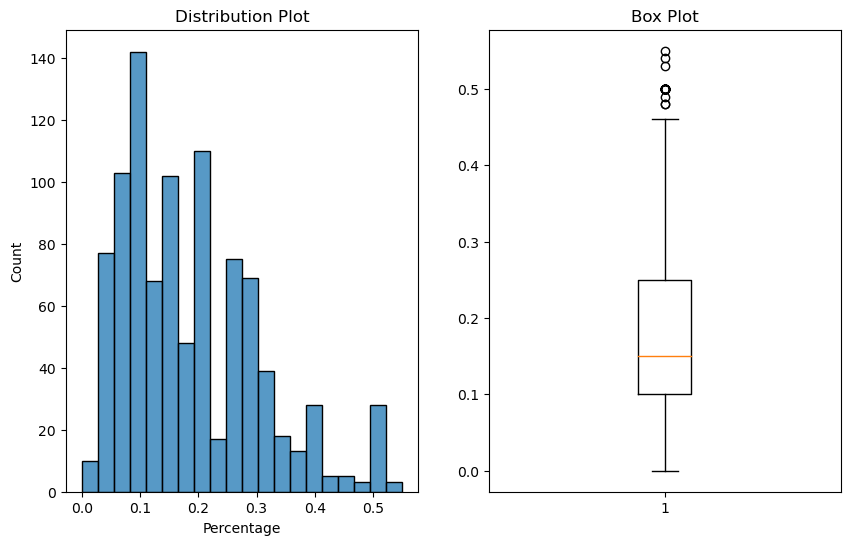

In [69]:
# Checking Outliers
check_outlier('Percentage')

In [70]:
# Getting the Upper and Lower limit.
low,high=inter_quantile(df,'Percentage')

In [71]:
# Eliminating the outliers.
df=df[(df['Percentage']<high)&(df['Percentage']>low)]

In [72]:
df.shape

(929, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x26d23f48bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x26d23cc8190>,
 'boxes': [<matplotlib.lines.Line2D at 0x26d23f488e0>],
 'medians': [<matplotlib.lines.Line2D at 0x26d23cc8730>],
 'fliers': [<matplotlib.lines.Line2D at 0x26d23cc8a00>],
 'means': []}

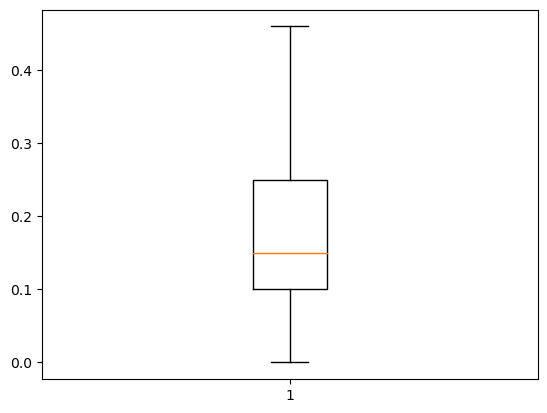

In [73]:
plt.boxplot(df['Percentage'])

ALL THE OUTLIERS ARE HANDLED 

# 2. FIXING LAID_OFF_COUNT

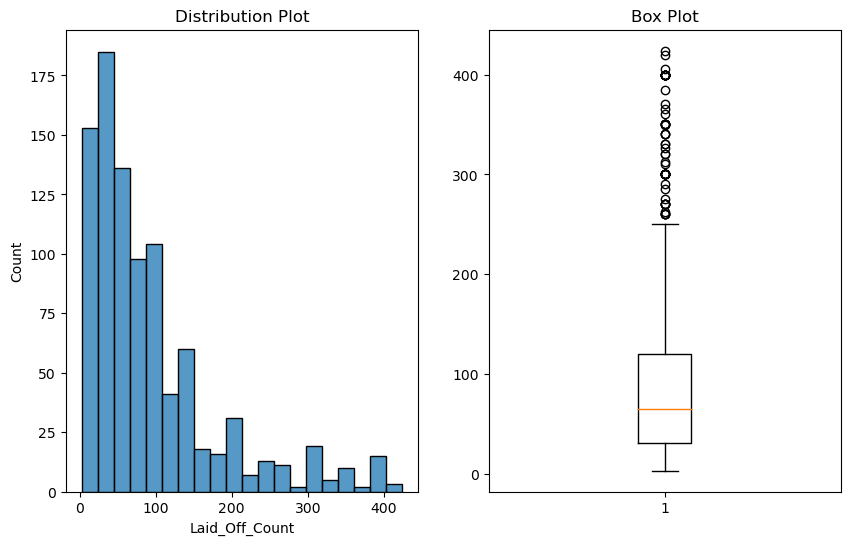

In [74]:
# Checking Outliers
check_outlier('Laid_Off_Count')

In [75]:
# Getting the Upper and Lower limit.
low,high=inter_quantile(df,'Laid_Off_Count')

In [76]:
# Eliminating the outliers.
df=df[(df['Laid_Off_Count']<high)&(df['Laid_Off_Count']>low)]

In [77]:
df.shape

(862, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x26d23b69fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x26d244905e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26d23b69d00>],
 'medians': [<matplotlib.lines.Line2D at 0x26d24490b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x26d24490e50>],
 'means': []}

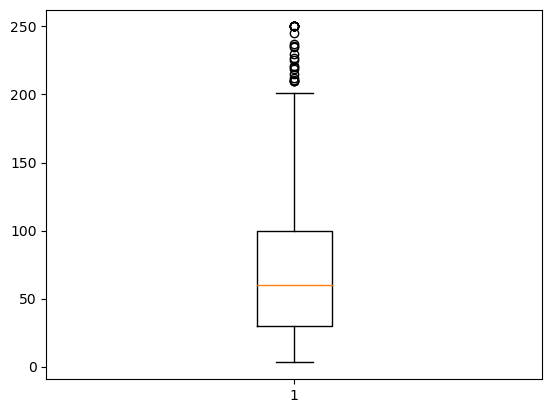

In [78]:
plt.boxplot(df['Laid_Off_Count'])

MOST OF THE OUTLIERS ARE HANDLED 

# 3. FIXING FUNDS_RAISED 

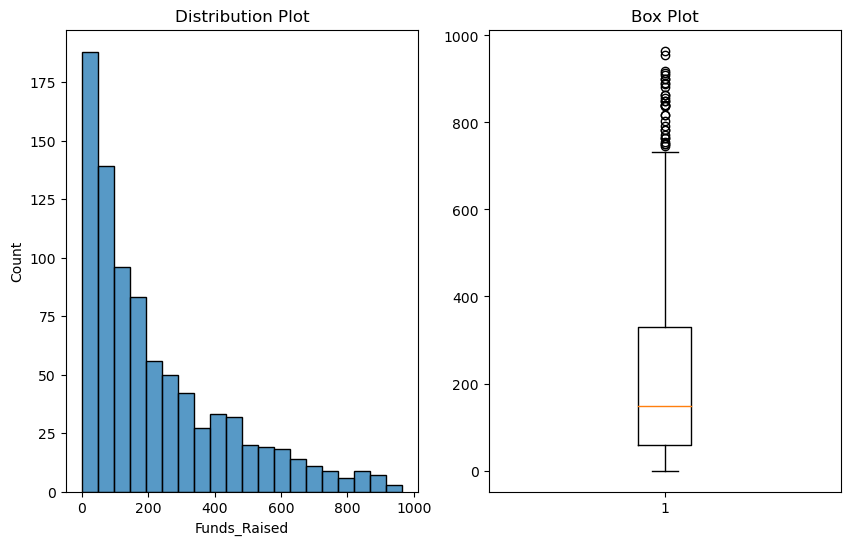

In [79]:
# Checking Outliers
check_outlier('Funds_Raised')

In [80]:
# Getting the Upper and Lower limit.
low,high=inter_quantile(df,'Funds_Raised')

In [81]:
# Getting the Upper and Lower limit.
low,high=inter_quantile(df,'Funds_Raised')

In [82]:
# Eliminating the outliers.
df=df[(df['Funds_Raised']<high)&(df['Funds_Raised']>low)]

In [83]:
df.shape

(830, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x26d25488490>,
 'caps': [<matplotlib.lines.Line2D at 0x26d25488a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x26d254881c0>],
 'medians': [<matplotlib.lines.Line2D at 0x26d25488fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26d254a12e0>],
 'means': []}

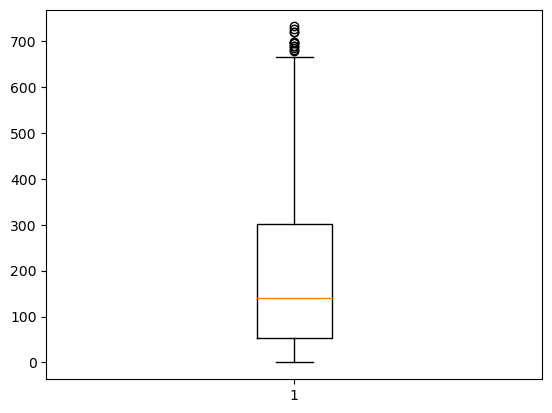

In [84]:
plt.boxplot(df['Funds_Raised'])

 MOST OF THE OUTLIERS INSTANCES ARE MUCH LESS THAN THE ORIGINAL NUMBER  

# (B) : HANDLING NULL VALUES 

IN THIS WE ARE REPLACING NULL VALUES WITH  MEAN OF THEIR RESPECTIVE COLUMNS.

In [28]:
df['Percentage'].fillna(value=df['Percentage'].mean(),inplace = True)

In [29]:
df['Funds_Raised'].fillna(value=df['Funds_Raised'].mean(),inplace = True)

In [30]:
df['Laid_Off_Count'].fillna(value=df['Laid_Off_Count'].mean(),inplace = True)

In [31]:
df.isnull().sum()

Company                       0
Location_HQ                   0
Industry                      0
Percentage                    0
Date                          0
Source                        0
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
Laid_Off_Count                0
List_of_Employees_Laid_Off    0
dtype: int64

# (C) : DROPPING UNNECESSARY COLUMN 

 THERE ARE MANY COLUMNS WHICH ARE NOT NECESSARY, SO WE ARE DROPPING IT.

In [32]:
df=df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off'], axis=1)

# (D) : Converting date column to date time and making Year and Month column from it..

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

In [34]:
df.drop(['Date'],inplace=True,axis=1)

In [35]:
df.head(2)

,Company,Location_HQ,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Month
5,CareRev,Los Angeles,Healthcare,0.33,51.0,Series A,United States,100.0,2023,June
11,Sonos,New York City,Consumer,0.07,455.2,Post-IPO,United States,130.0,2023,June


# STEP 5:
# PERFORMING VISUALISATION: 

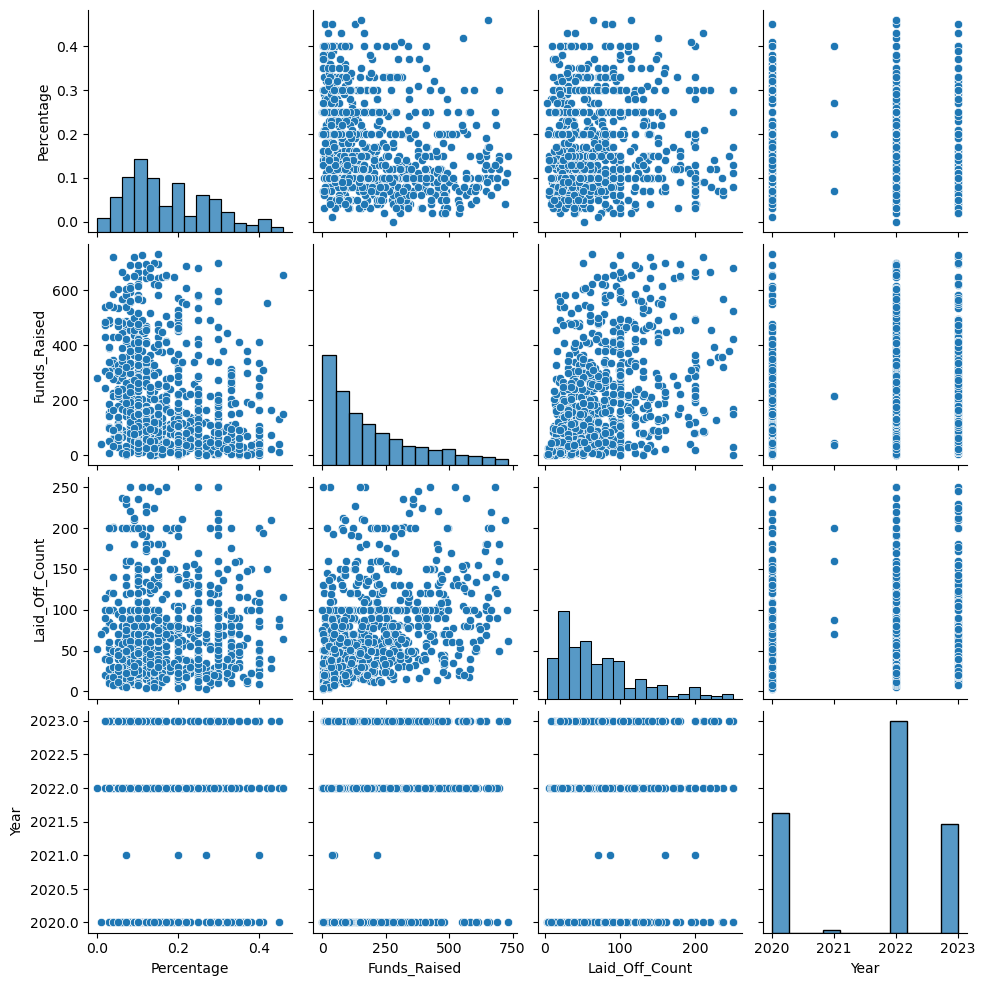

In [85]:
# THIS CHART IS USED TO SHOW THE REALIONSHIP BETWEEN THE VARIABLES WITH THE DATASET.. 
sns.pairplot(df)

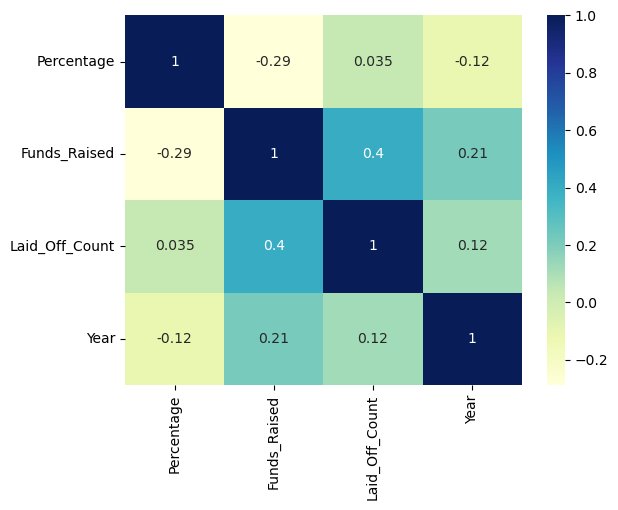

In [86]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# (A).  ANALYSIS OF LAYOFFS IN INDUSTRY :

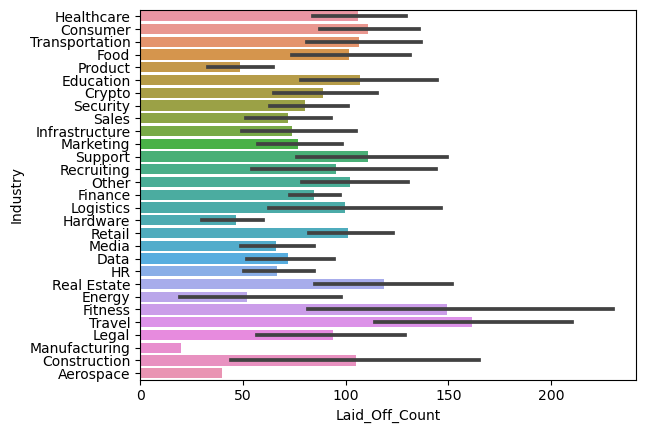

In [38]:
sns.barplot(x='Laid_Off_Count',y='Industry',data=df)
plt.show()

CONCLUSION:
    
•     MOST OF LAID OFF IS DONE BY TRAVEL INDUSTRIES

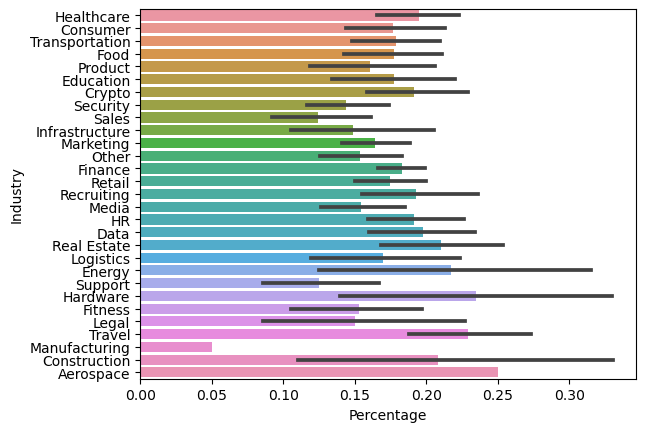

In [87]:
sns.barplot(x='Percentage',y='Industry',data=df)
plt.show()

CONCLUSION:

• ACCORDING TO ABOVE PERCENATGE WISE CHART MOST OF THE  LAID OFF IS DONE BY CONSTRUCTION

# (B).  ANALYSIS Of LAYOFF YEAR AND MONTH WISE:

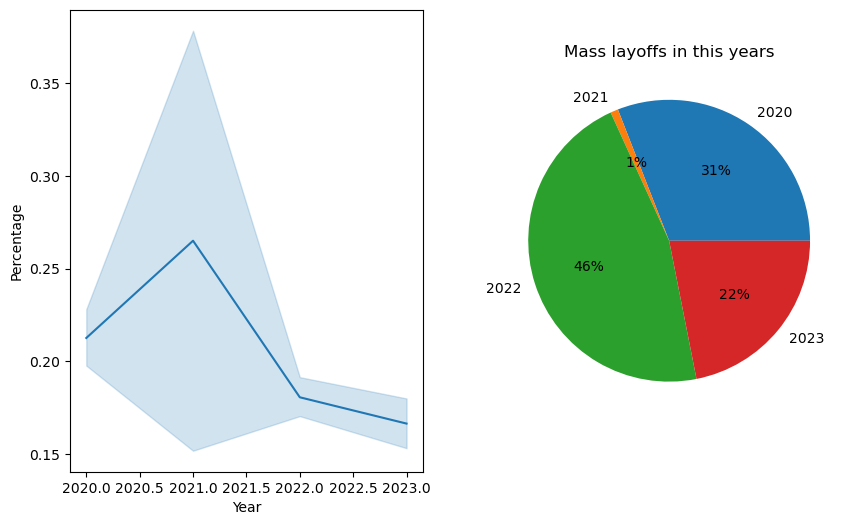

In [40]:
plt.figure(figsize=(10, 6))


laidOff_countYear = df.groupby('Year', as_index=False).sum()
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y="Percentage", data=df)


 

plt.show()

Conclusion:


• MOST LAID OFF IS DONE IN YEAR 2022

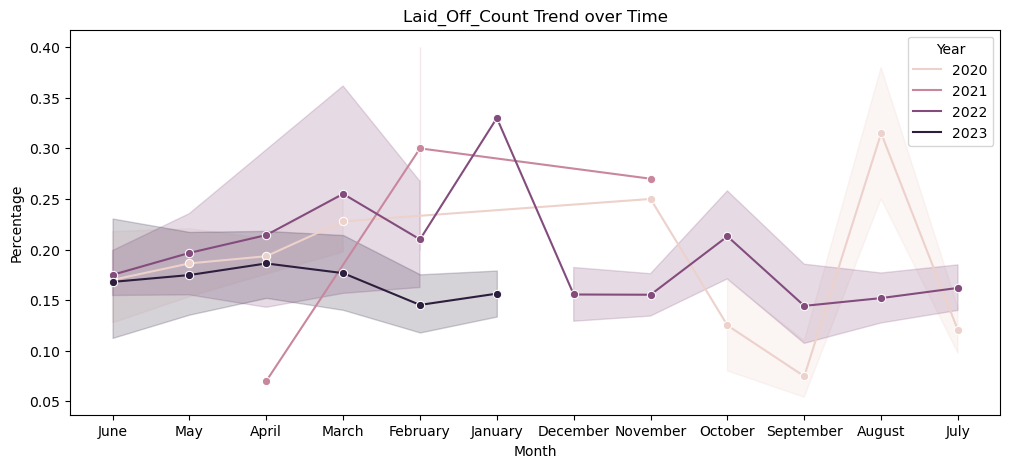

In [89]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Month', y='Percentage', hue='Year', marker='o')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Laid_Off_Count Trend over Time')
plt.show()

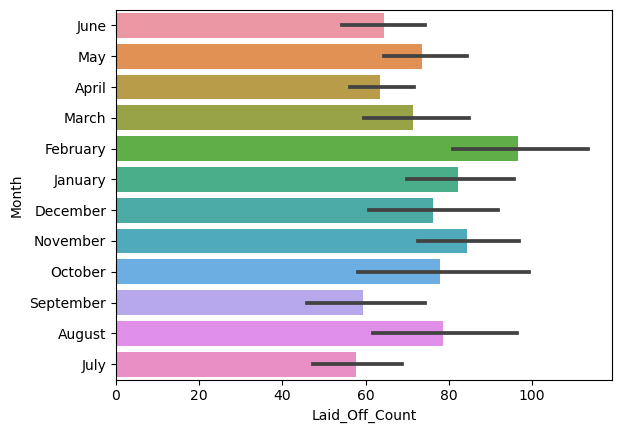

In [88]:
sns.barplot(x='Laid_Off_Count',y='Month',data=df)
plt.show()

Conclusion:

• THE MOST OF THE LAID OFF IS DONE IN FEBRUARY 2022     

# (C). CONTINENT WISE LAYOFF..

In [43]:
laidOff_countByCountry = df.groupby('Country', as_index=False).sum()

In [44]:
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']
europe = ['Austria', 'Bulgaria','Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 
          'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']

north_america = ['Canada', 'Mexico', 'United States']
south_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']
oceania = ['Australia', 'New Zealand']

In [45]:
asia= laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]
europe= laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(europe)]

north_america = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(north_america)]
south_america= laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(south_america)]

africa= laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(africa)]
oceania= laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(oceania)]

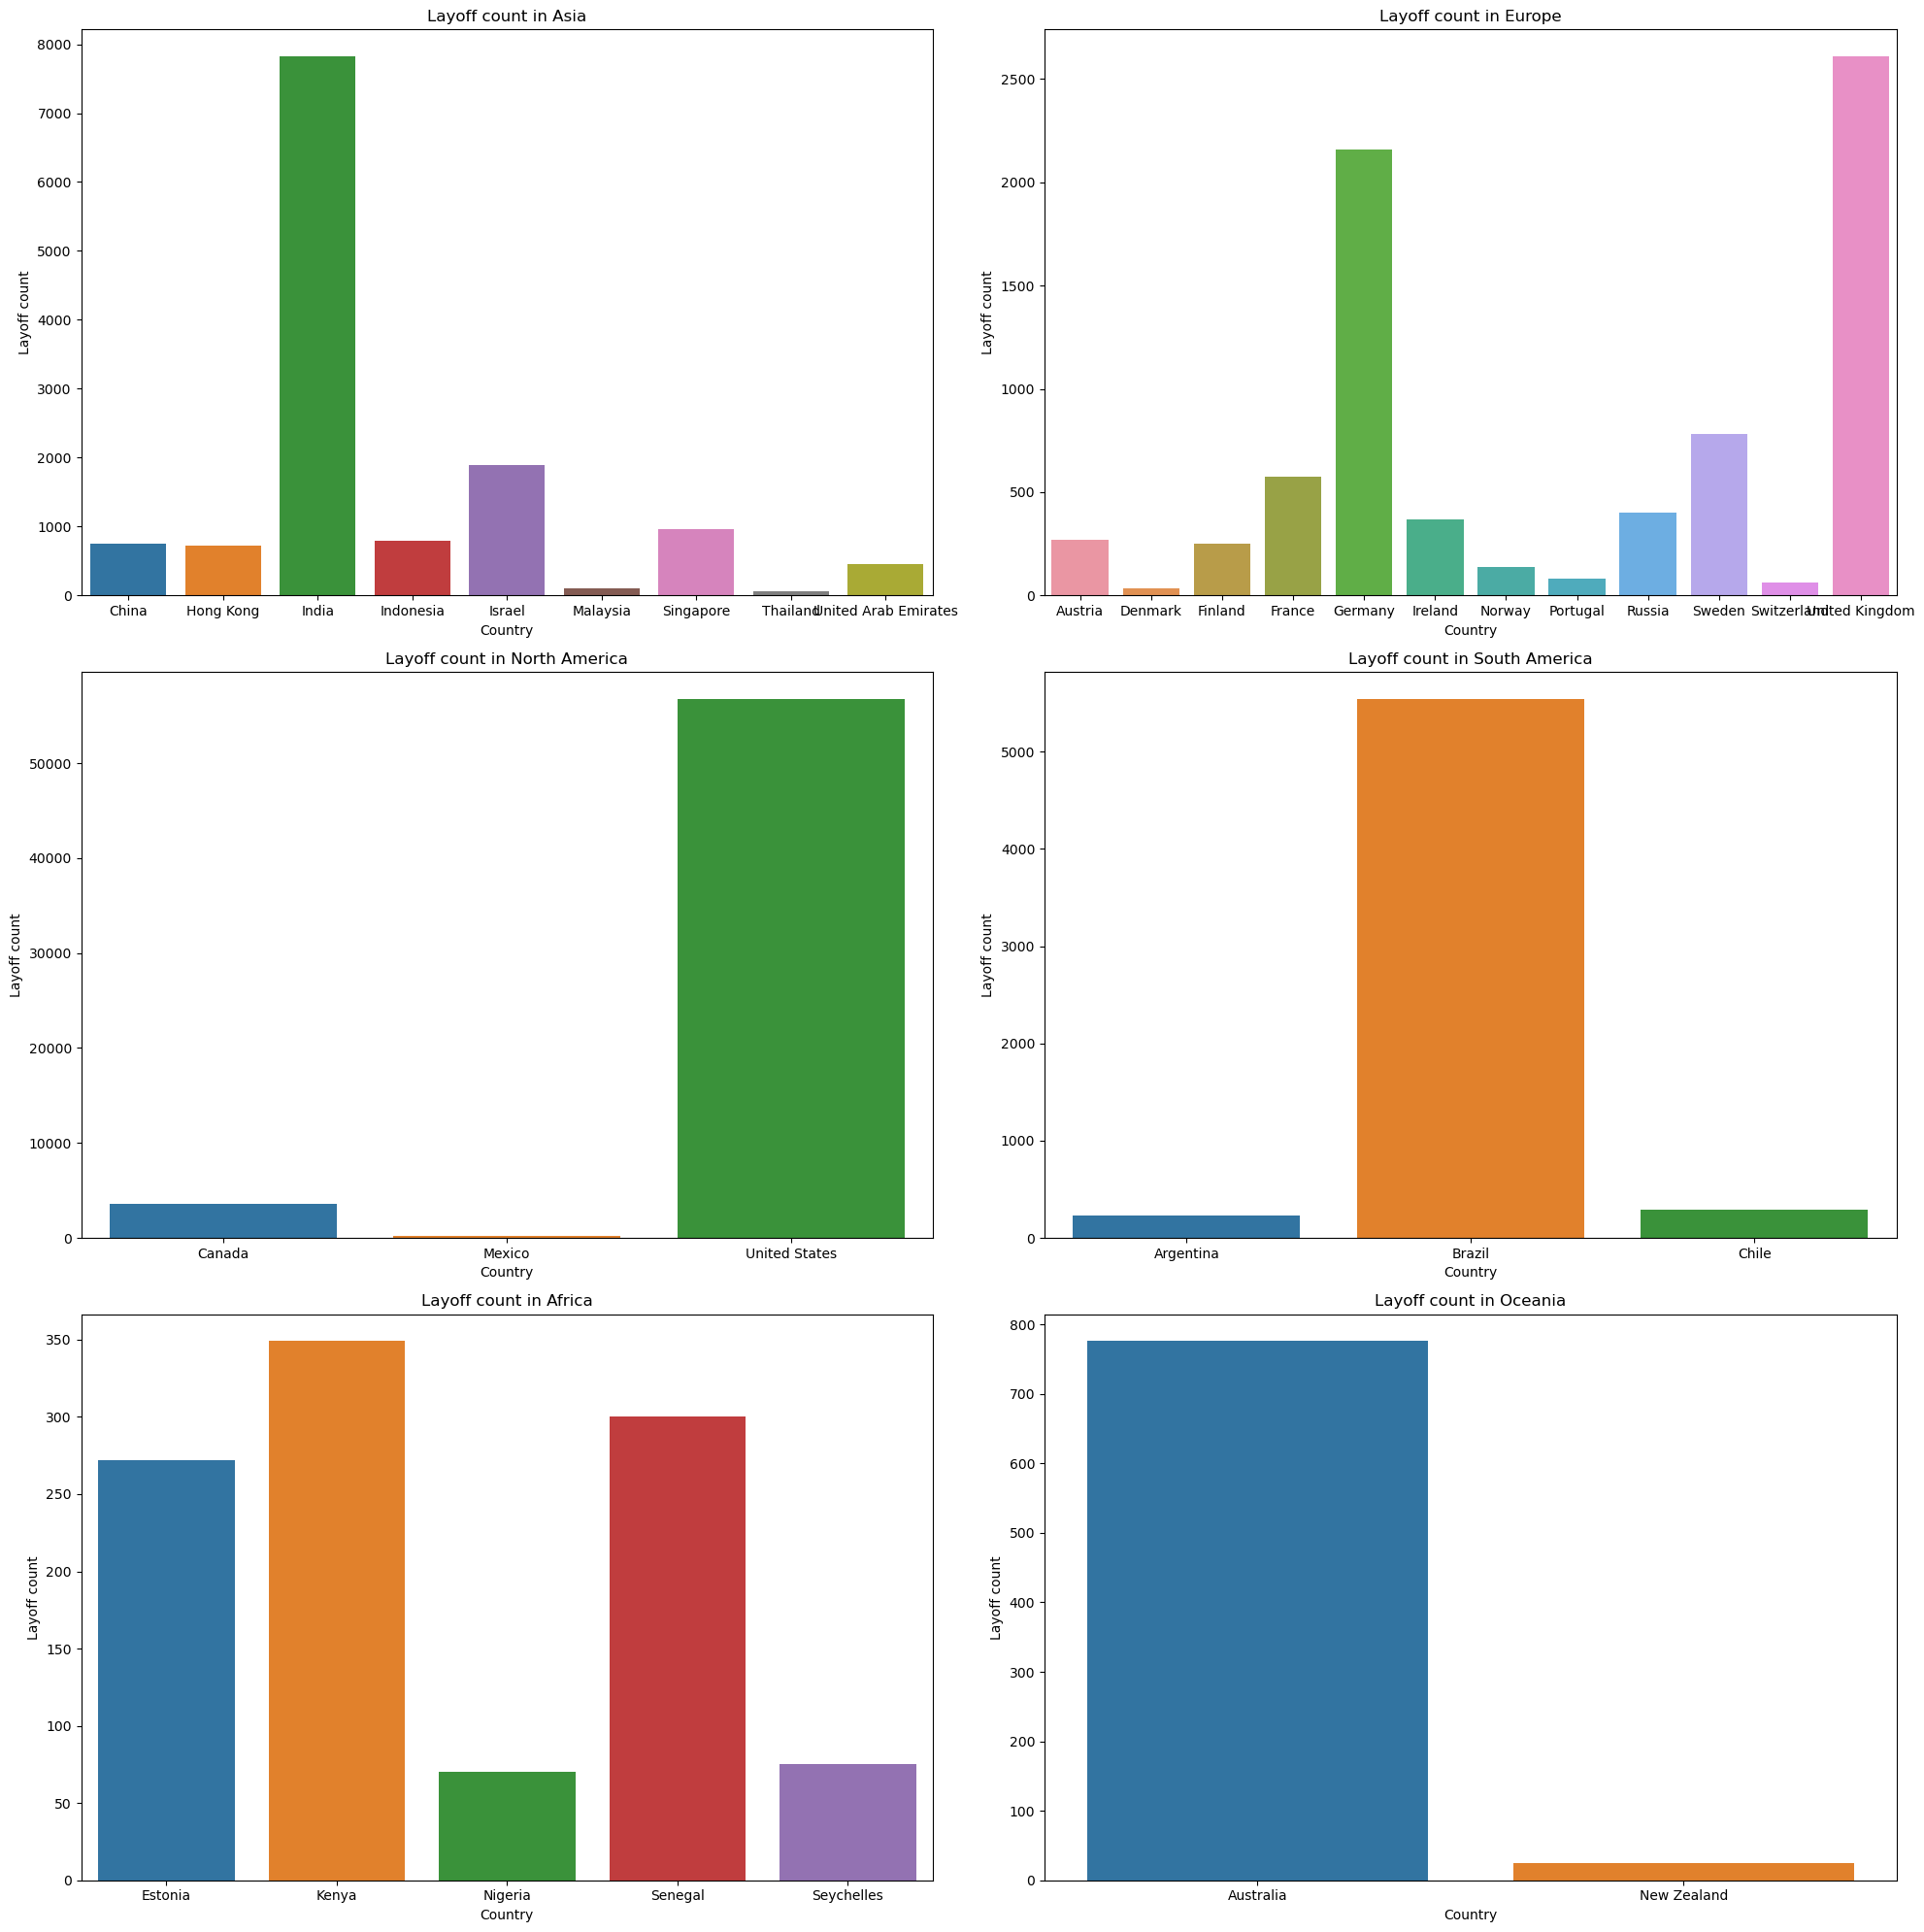

In [46]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.barplot(data=asia, y=asia['Laid_Off_Count'], x=asia['Country'])
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Asia")

plt.subplot(3, 2, 2)
sns.barplot(data=europe,y=europe['Laid_Off_Count'], x=europe['Country'])
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in Europe")

plt.subplot(3, 2, 3)
sns.barplot(data=north_america, y=north_america['Laid_Off_Count'], x=north_america['Country'])
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in North America")

plt.subplot(3, 2, 4)
sns.barplot(data=south_america, y=south_america['Laid_Off_Count'], x=south_america['Country'])
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in South America")

plt.subplot(3, 2, 5)
sns.barplot(data=africa, y=africa['Laid_Off_Count'], x=africa['Country'])
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in Africa")

plt.subplot(3, 2, 6)
sns.barplot(data=oceania, y=oceania['Laid_Off_Count'], x=oceania['Country'])
plt.xlabel('Country')
plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania")

plt.tight_layout()
plt.show()

# (D). MASS LAYOFF COUNTRIES FROM EACH CONTINENT

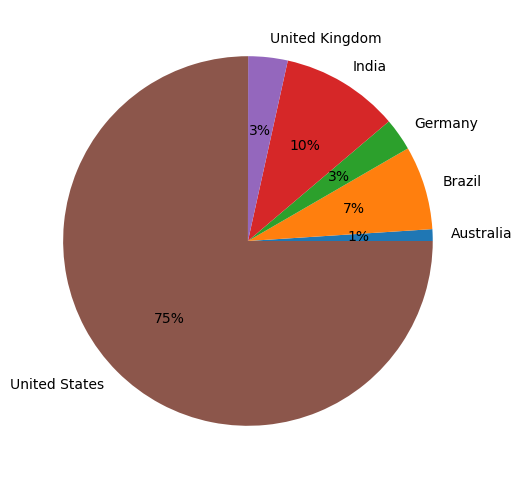

In [91]:
mass_layoff_countries= ['India', 'Germany', 'United Kingdom', 'United States', 'kenya', 'Australia','Brazil']
mass_layoff_countries= laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(mass_layoff_countries)]
plt.figure(figsize=(10, 6))
plt.pie(data=mass_layoff_countries,x=mass_layoff_countries['Laid_Off_Count'],labels=mass_layoff_countries['Country']
        ,autopct='%.f%%')
plt.show()

Conclusion:

• THE MOST OF THE LAID OFF IS DONE BY UNITED STATES FROM NORTH AMERICA 

# (E). TOP 10 COUNTRIES WITH HIGHEST LAYOFF:

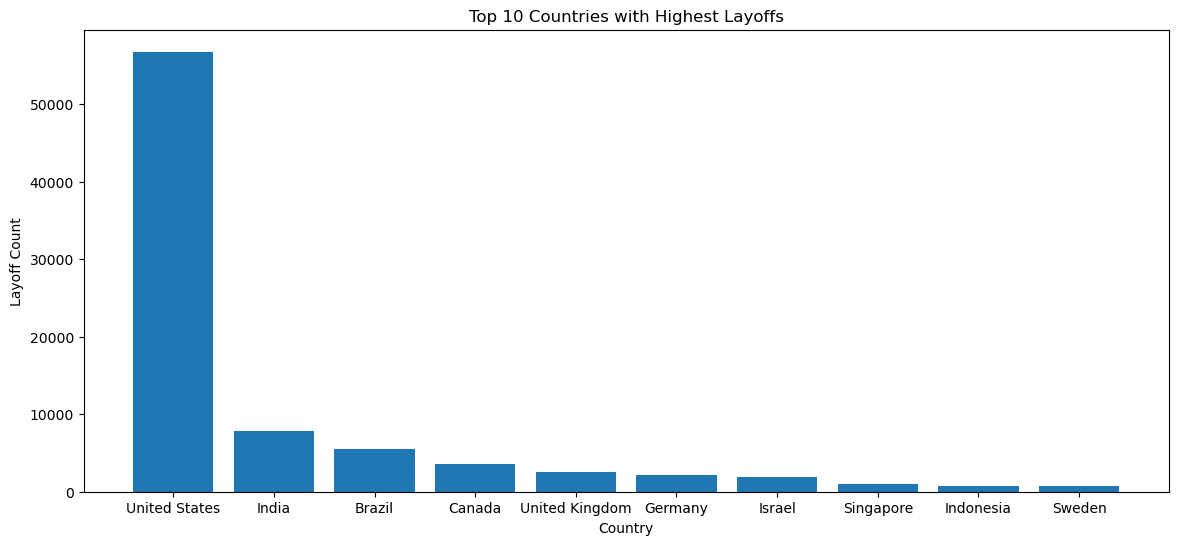

In [48]:
grouped_data = df.groupby('Country')['Laid_Off_Count'].sum().reset_index()
sorted_data = grouped_data.sort_values('Laid_Off_Count', ascending=False)
top_10_countries = sorted_data.head(10)
plt.figure(figsize=(14, 6))
plt.bar(top_10_countries['Country'], top_10_countries['Laid_Off_Count'])
plt.xlabel('Country')
plt.ylabel('Layoff Count')
plt.title('Top 10 Countries with Highest Layoffs')
plt.show()

# (F). TOP 10 COMPANY WITH HIGHEST LAYOFF:

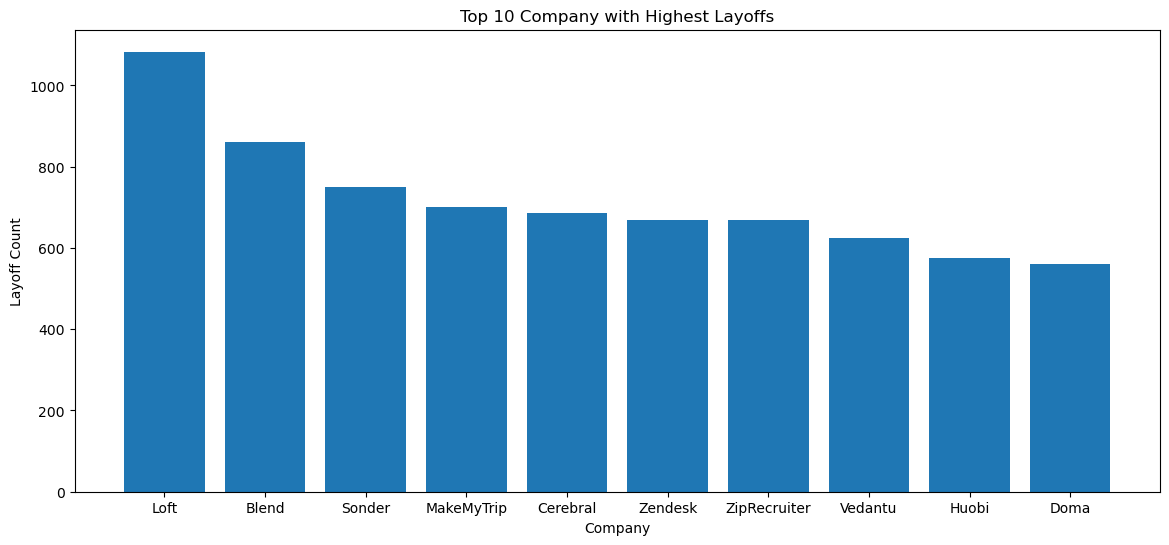

In [49]:
grouped_data = df.groupby('Company')['Laid_Off_Count'].sum().reset_index()
sorted_data = grouped_data.sort_values('Laid_Off_Count', ascending=False)
top_10_countries = sorted_data.head(10)
plt.figure(figsize=(14, 6))
plt.bar(top_10_countries['Company'], top_10_countries['Laid_Off_Count'])
plt.xlabel('Company')
plt.ylabel('Layoff Count')
plt.title('Top 10 Company with Highest Layoffs')
plt.show()


# (G). TOP 10 LOCATION HEADQUARTER OF UNITED STATES HAVING HIGHEST LAYOFF

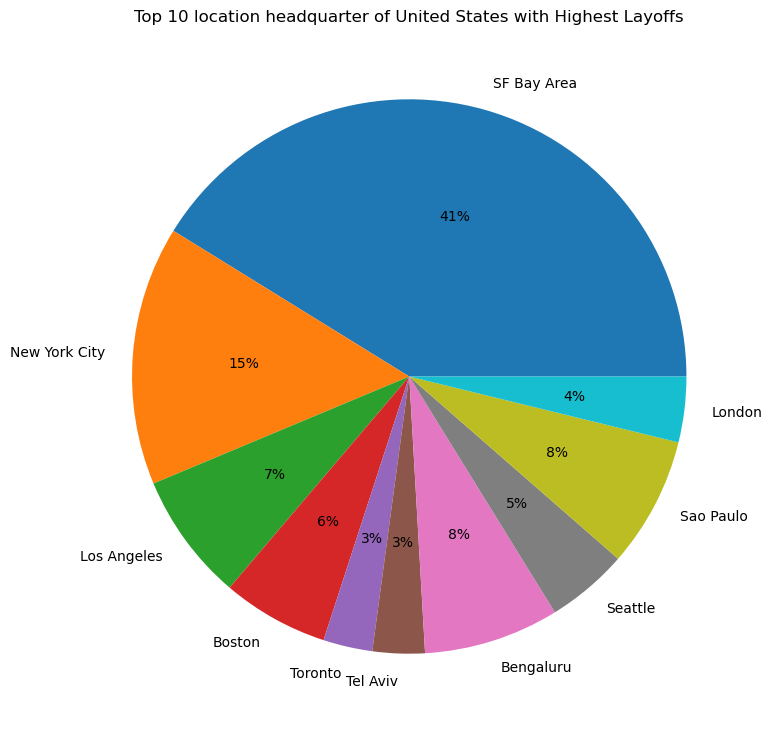

In [50]:
usa= df[df['Country'] == 'United States']
usa= df.groupby('Location_HQ').sum().sort_values(by='Percentage',ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 9))
plt.pie(data=usa, x=usa['Laid_Off_Count'], labels=usa['Location_HQ'],autopct='%.f%%')
plt.title('Top 10 location headquarter of United States with Highest Layoffs')
plt.show()

# (H). TOP 10 LOCATION HEADQUARTER OF INDIA IN HIGHEST LAYOFF :

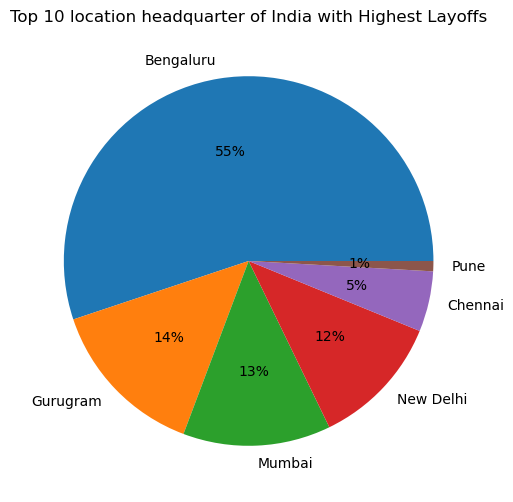

In [51]:
ind= df[df['Country'] == 'India']
ind= ind.groupby('Location_HQ').sum().sort_values(by='Percentage',ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
plt.pie(data=ind, x=ind['Percentage'], labels=ind['Location_HQ'],autopct='%.f%%')
plt.title('Top 10 location headquarter of India with Highest Layoffs')
plt.show()

# (I). TOP 10 COMPANY OF INDIA HAVING HIGHEST LAYOFF :

Text(0.5, 1.0, "'Top 10 Company of India with number of  Highest Layoffs'")

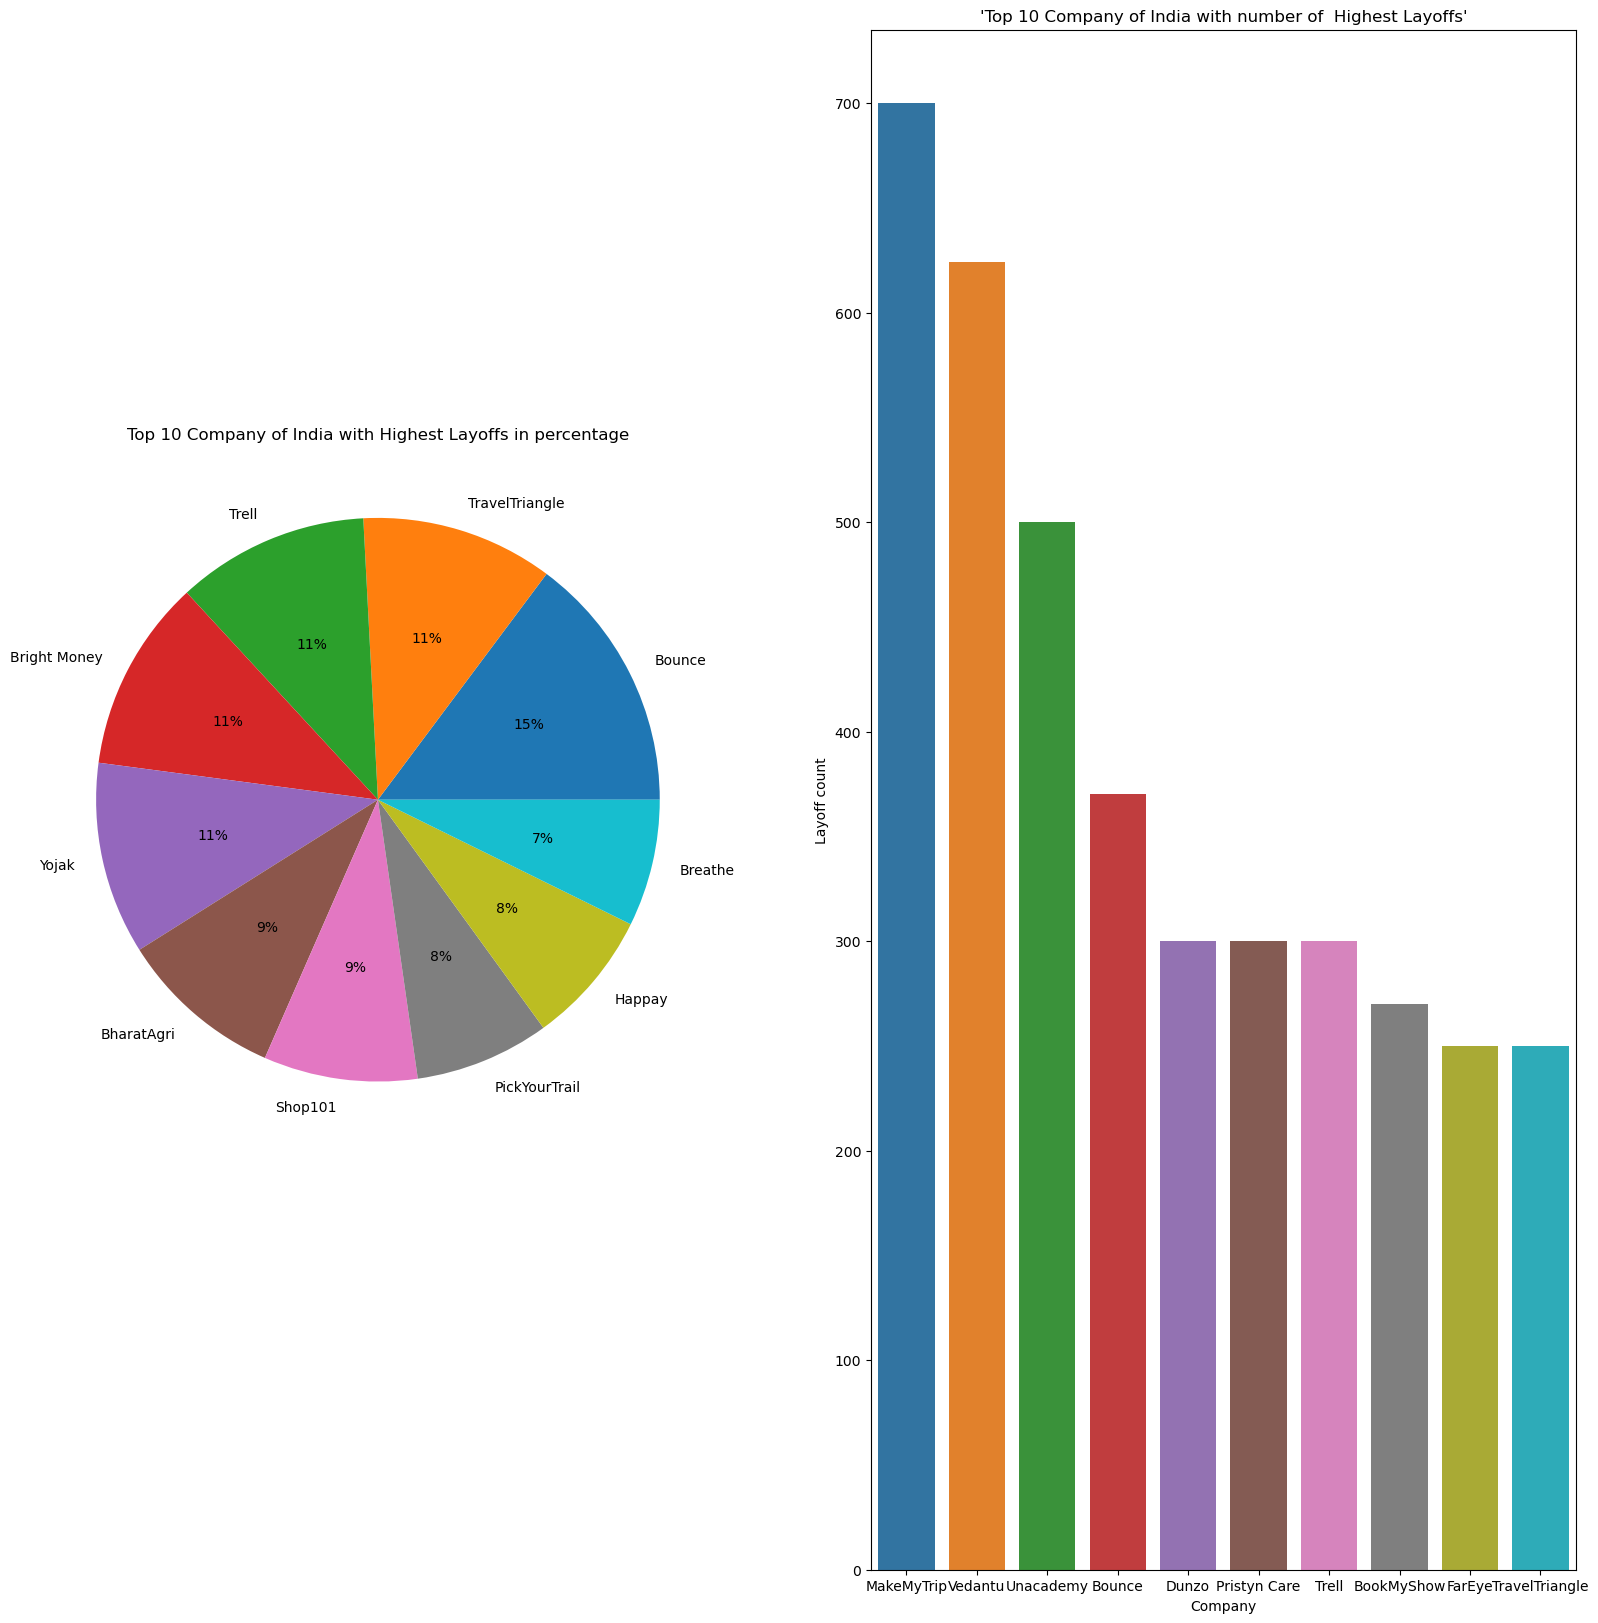

In [52]:
ind= df[df['Country'] == 'India']
ind= ind.groupby('Company').sum().sort_values(by='Percentage',ascending=False).head(10).reset_index()
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.pie(data=ind, x=ind['Percentage'], labels=ind['Company'],autopct='%.f%%')
plt.title('Top 10 Company of India with Highest Layoffs in percentage')

ind= df[df['Country'] == 'India']
ind= ind.groupby('Company').sum().sort_values(by='Laid_Off_Count',ascending=False).head(10).reset_index()

plt.subplot(1, 2, 2)
sns.barplot(data=ind,y=ind['Laid_Off_Count'], x=ind['Company'])
plt.xlabel('Company')
plt.ylabel('Layoff count')
plt.title("'Top 10 Company of India with number of  Highest Layoffs'")

# (J). TOP STAGE OF HIGHEST LAYOFF  :

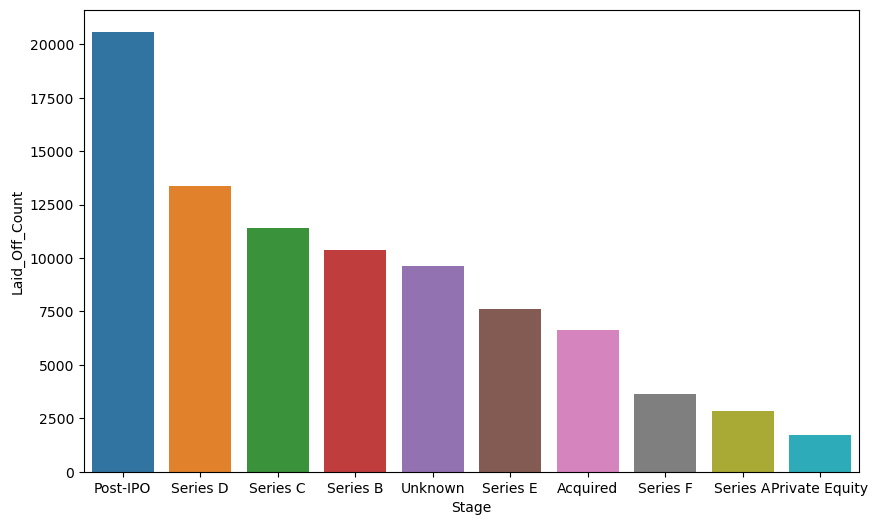

In [53]:
plt.figure(figsize=(10, 6))
df1=df.groupby(['Stage']).sum().sort_values(by="Laid_Off_Count",ascending=False).head(10).reset_index()
sns.barplot(data=df1, x=df1["Stage"], y=df1["Laid_Off_Count"])
plt.show()

# (K). LAYOFF TREND AT POST_IPO COMPANIES :

In [54]:
postipo_companies= df[df['Stage'] == 'Post-IPO']
postipo_companies

,Company,Location_HQ,Industry,Percentage,Funds_Raised,Stage,Country,Laid_Off_Count,Year,Month
11,Sonos,New York City,Consumer,0.07,455.2,Post-IPO,United States,130.0,2023,June
12,TrueCar,Los Angeles,Transportation,0.24,340.0,Post-IPO,United States,102.0,2023,June
13,Olo,New York City,Food,0.11,184.0,Post-IPO,United States,81.0,2023,June
19,Chegg,SF Bay Area,Education,0.04,227.0,Post-IPO,United States,80.0,2023,June
40,Edgio,Phoenix,Infrastructure,0.12,462.0,Post-IPO,United States,134.0,2023,June
...,...,...,...,...,...,...,...,...,...,...
2470,Domo,Salt Lake City,Data,0.10,689.0,Post-IPO,United States,90.0,2020,April
2503,Sage Therapeutics,Boston,Healthcare,0.53,438.0,Post-IPO,United States,340.0,2020,April
2504,Redfin,Seattle,Real Estate,0.07,319.0,Post-IPO,United States,236.0,2020,April
2624,Maven,Seattle,Media,0.09,77.0,Post-IPO,United States,31.0,2020,March


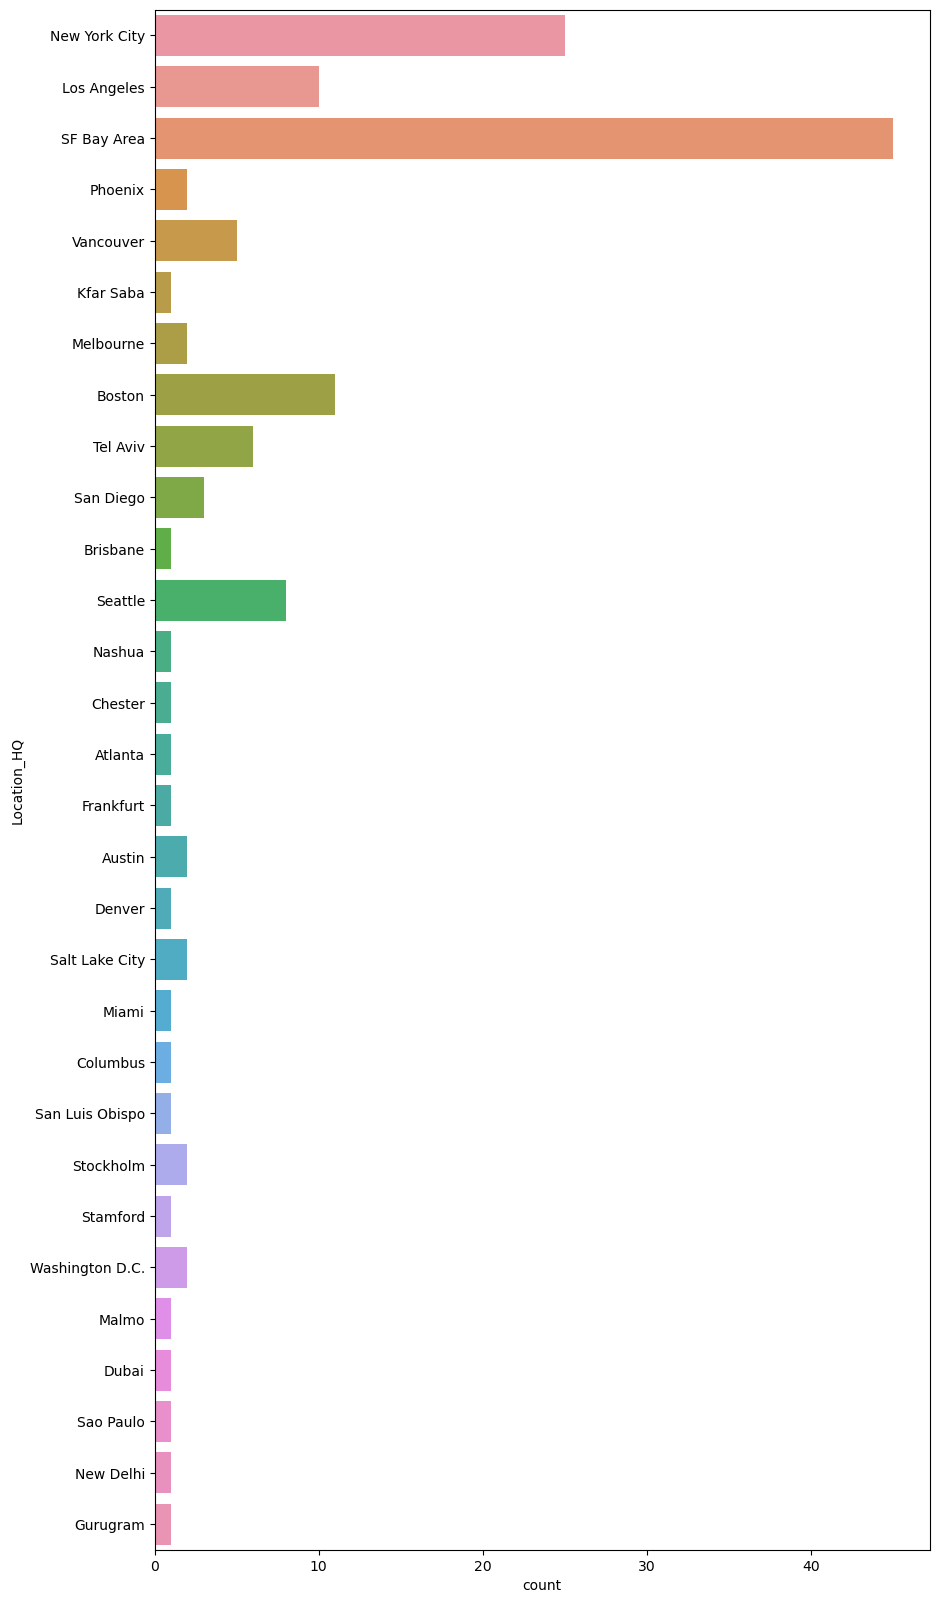

In [55]:
plt.figure(figsize=(10,20))
sns.countplot(y=postipo_companies.Location_HQ)
plt.show()

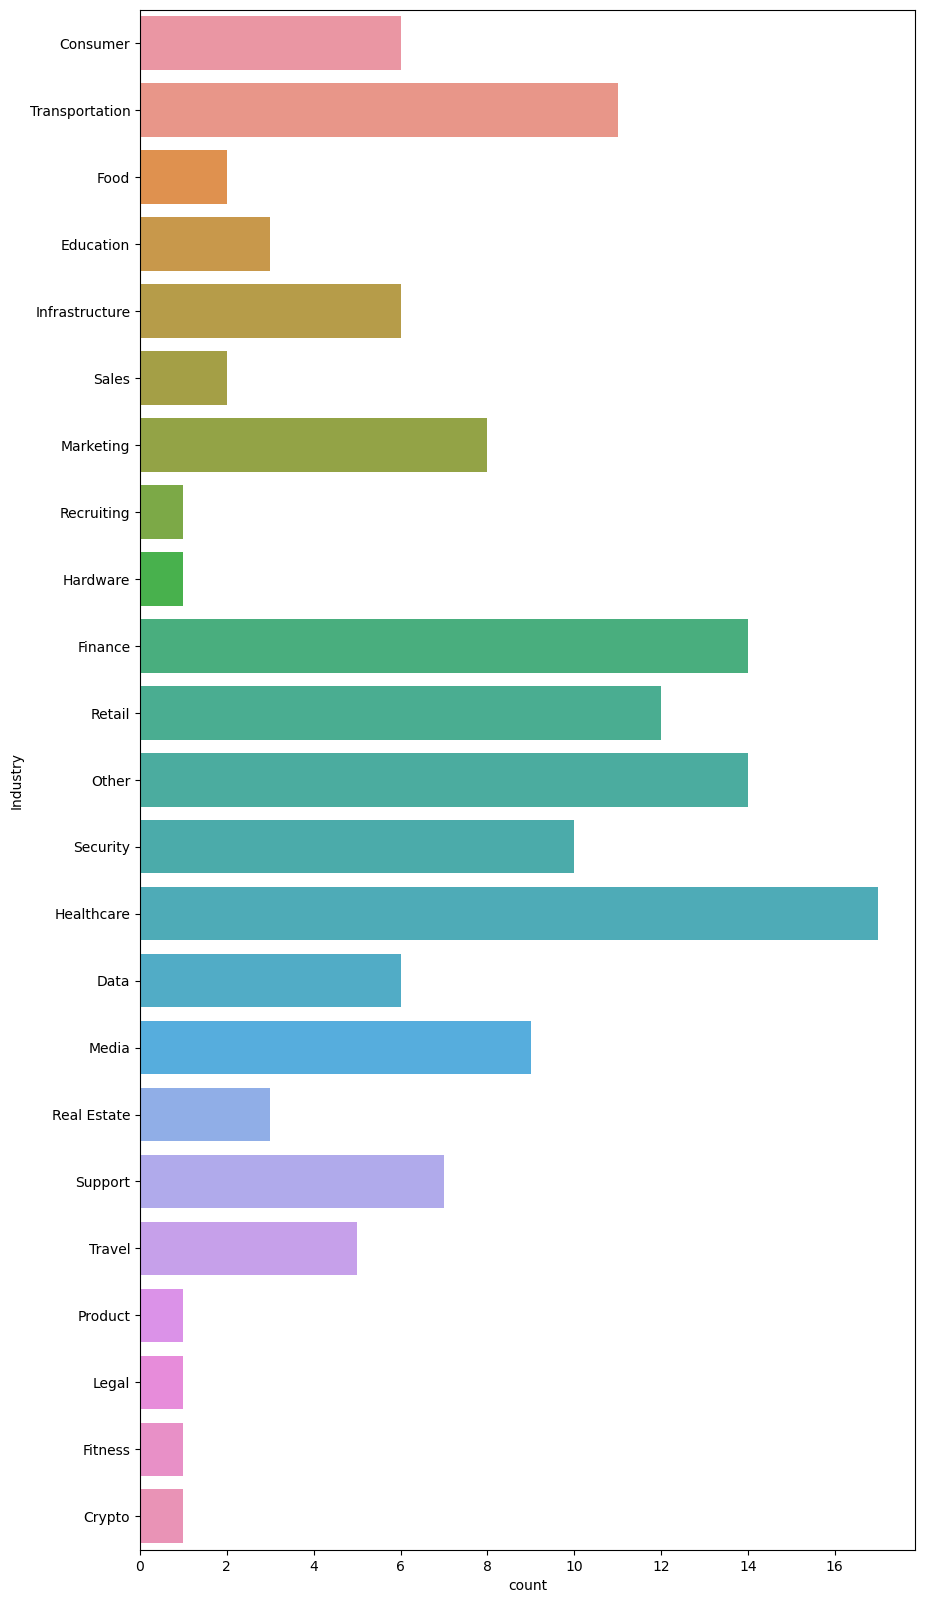

In [56]:
plt.figure(figsize=(10,20))
sns.countplot(y=postipo_companies.Industry)
plt.show()

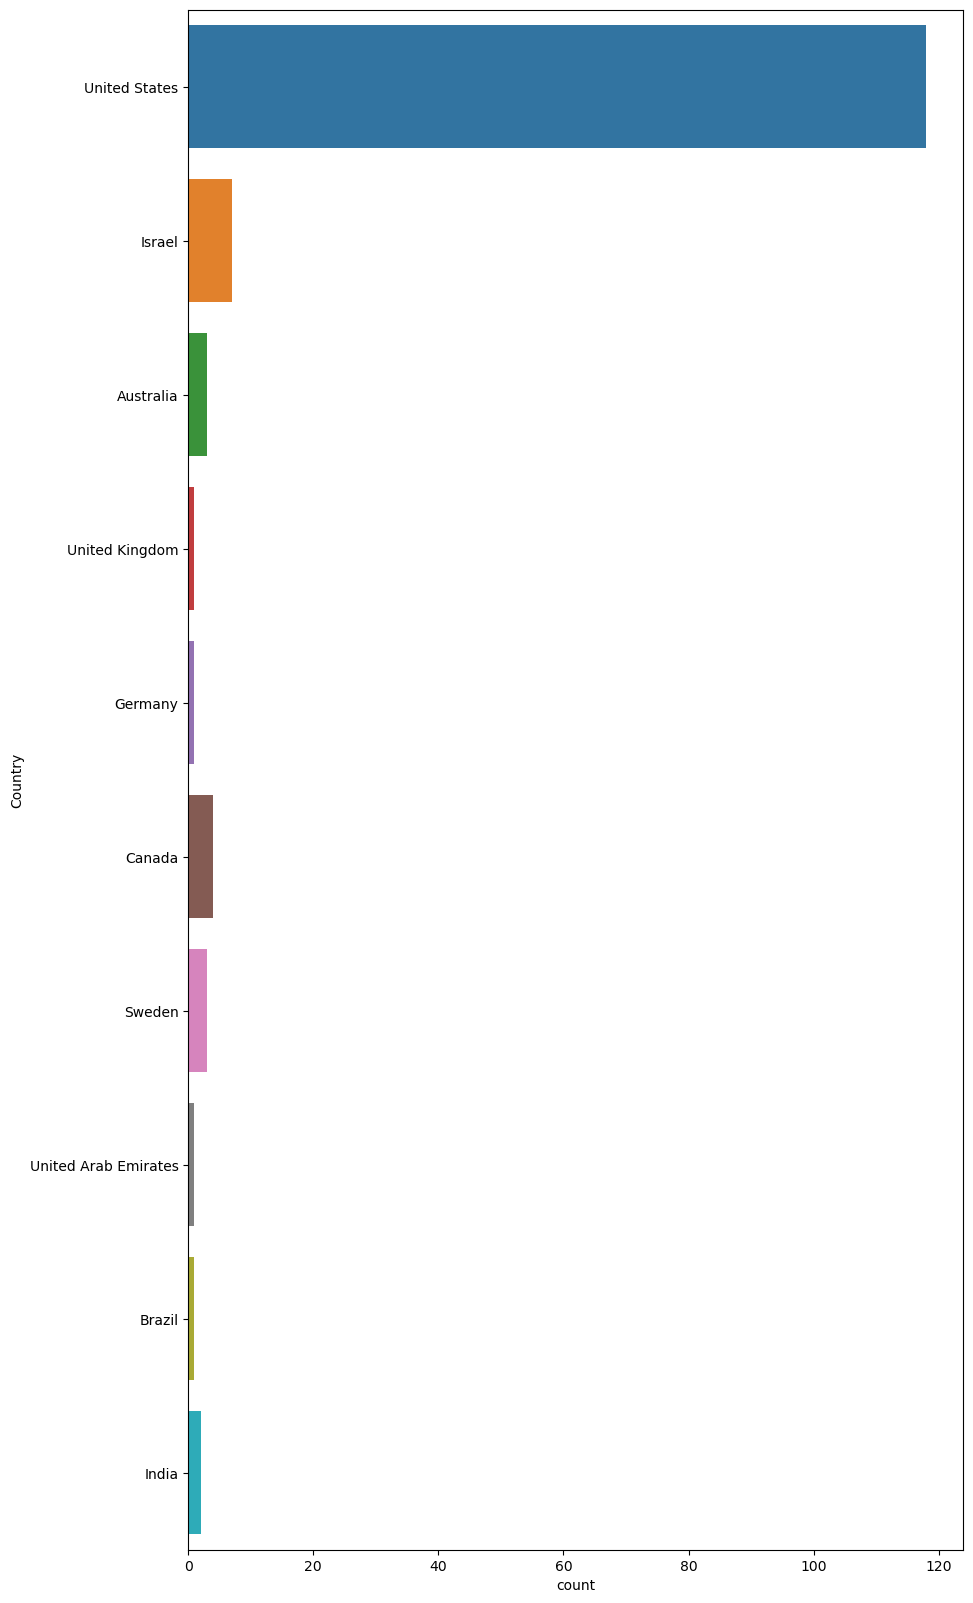

In [57]:
plt.figure(figsize=(10,20))
sns.countplot(y=postipo_companies.Country)
plt.show()

# (L). TIMELINE OF LAYOFFS AT POST-IPO :

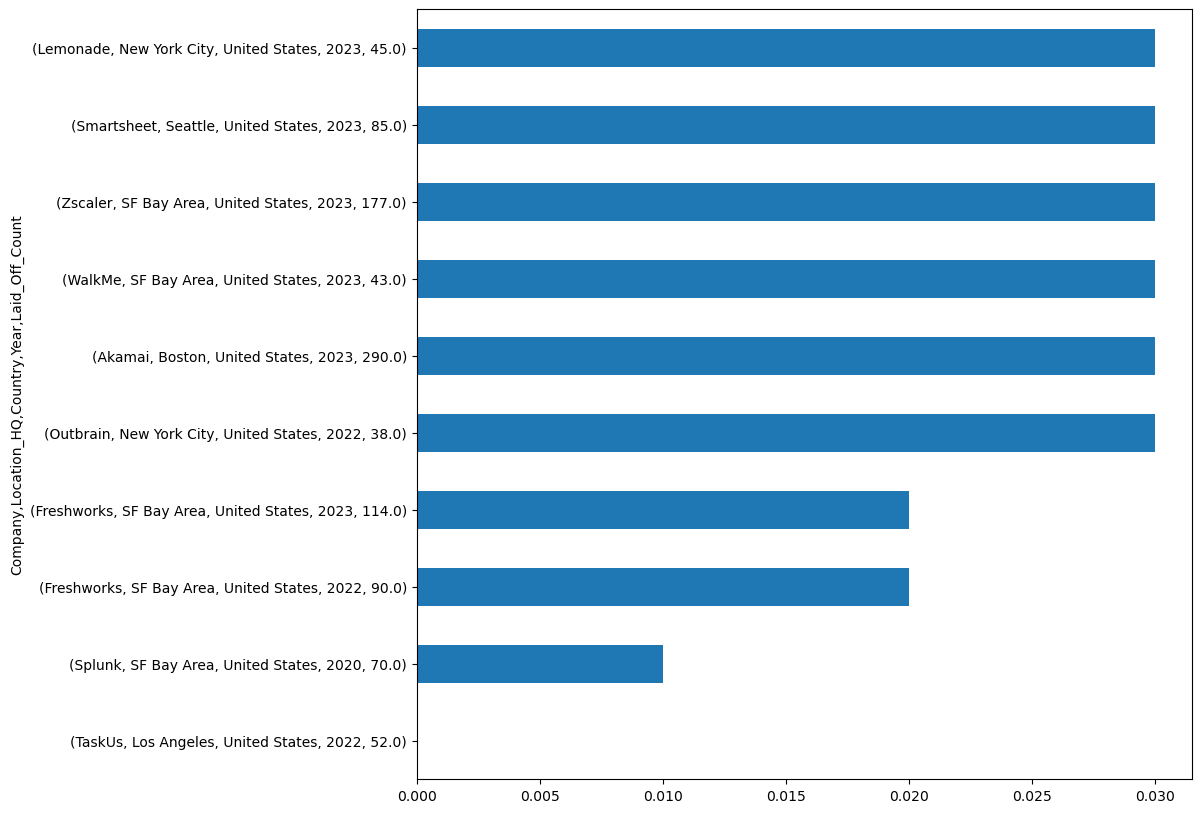

In [95]:
postipo_companies.groupby(['Company','Location_HQ','Country','Year','Laid_Off_Count'])['Percentage'].sum()
.sort_values(ascending=True).head(10).plot.barh(figsize=(10,10))
plt.show()

# (M). FUND RAISED VS  LAYOFF :

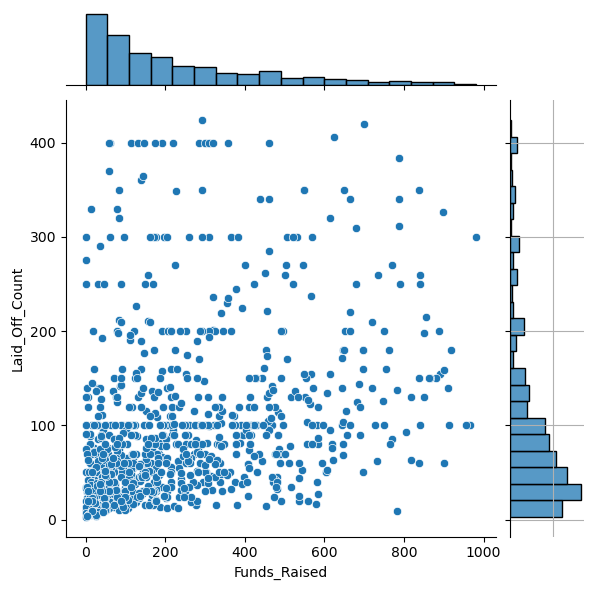

In [59]:
sns.jointplot(data=df,x="Funds_Raised",y="Laid_Off_Count",palette='PuRd')
plt.grid()
plt.show()

# CONCLUSION:
    •  MOST OF THE NUMBER OF LAYOFFS IS DONE BY THE TRAVEL INDUSTRY AND PERCENTAGE-WISE IS DONE BY CONSTRUCTION
    •  MOST OF THE LAYOFF IS DONE IN THE MONTH OF FEBRUARY IN THE YEAR 2022.
    •  MOST OF THE LAYOFFS ARE DONE IN THE CONTINENT OF NORTH AMERICA.
    •  THE SECOND-HIGHEST LAYOFFS ARE DONE IN THE CONTINENT OF ASIA.
    •  THE MASS LAYOFFS OF COUNTRIES FROM EACH CONTINENT ARE INDIA, THE UNITED STATES, BRAZIL, GERMANY, UNITED KINGDOM  AND 
    AUSTRALIA.
    •  UNITED STATES, INDIA, BRAZIL, CANADA, UNITED KINGDOM, GERMANY,  ISRAEL,  SINGAPORE,  INDONESIA  AND SWEDEN ARE THE   
    TOP 10 COUNTRIES WITH THE HIGHEST LAYOFFS
    •  LOCATION_HQ - SF BAY AREA HAS THE HIGHEST LAYOFFS IN THE UNITED STATES 
    •  LOCATION_HQ - BENGALURU HAS THE HIGHEST LAYOFFS IN THE INDIA
    •  IN INDIA MOST OF THE LAYOFFS COMPANIES ARE MAKE  MY TRIP AND PERCENTAGE-WISE IS BOUNCE
    •  POST- IPO STAGE OF THE COMPANY HAS DONE THE HIGHEST LAYOFFS
    •  UNITED STATES IS A COUNTRY IN WHICH MOST OF THE LAYOFFS ARE DONE IN POST-IPO COMPANIES AND HAVE LOCATION_HQ - SF BAY AREA